In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.ndimage import gaussian_filter
import matplotlib.cm as cm

In [55]:
#Load dataframes
column_names = ['wavelength', 'CD'] 
df=pd.read_csv('B22_3p5mgmL_DEpsilon.txt', sep='\t', names=column_names)

wavelengths=df['wavelength']
measurements=df['CD']

df_CDNN = pd.read_csv('CNN_deconvolution_B22_best.txt', sep=',')
CDNN_values=df_CDNN['180-260 nm']

values = []
names = []
for index, row in df_CDNN.iterrows():
    name = index
    names.append(name)
    value_str = row.iloc[0]  # Extracting the first value in each row
    value = float(value_str.replace(' %', ''))  # Convert percentage string to float
    values.append(value)
values=values[:-1]
names=names[:-1]
print(names)
print(values)

['Helix', 'Antiparallel', 'Parallel', 'Beta-Turn', 'Rndm. Coil']
[15.3, 46.4, 2.0, 20.9, 25.2]


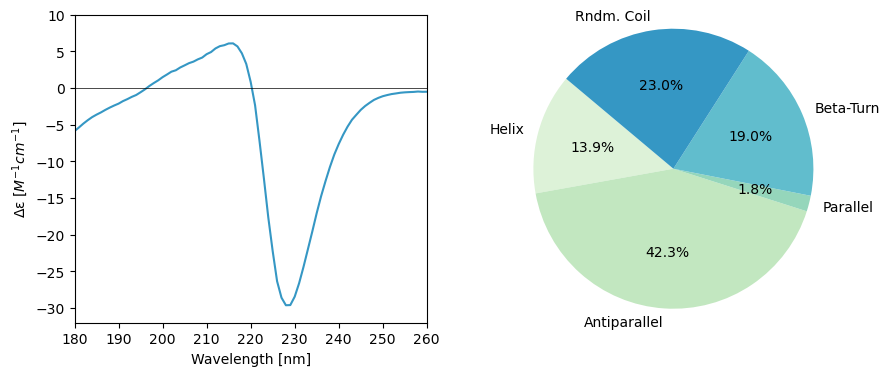

In [59]:
#Plots:
cmap=sns.color_palette('GnBu')

fig, axs = plt.subplots(1,2, figsize=(10, 4))
axs[0].plot(wavelengths, measurements, color=cmap[4])
axs[0].set_ylabel('Δε [$M^{-1} cm^{-1}$]')
axs[0].set_xlabel('Wavelength [nm]')

axs[0].set_xlim(180, 260)
axs[0].hlines(y=0, xmin=180, xmax=260, linewidth=0.5, color='k')
axs[0].set_ylim(-32, 10)

axs[1].pie(values, labels=names, autopct='%1.1f%%', startangle=140, colors=cmap)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("B22_CD_secondarystructure.png", bbox_inches="tight",pad_inches=0.3)
plt.show()

In [5]:
df_CDNN

,180-260 nm,185-260 nm,190-260 nm,195-260 nm,200-260 nm,205-260 nm,210-260 nm
Helix,15.3 %,9.1 %,6.8 %,8.0 %,7.2 %,4.2 %,4.2 %
Antiparallel,46.4 %,49.1 %,46.6 %,39.7 %,39.7 %,43.8 %,45.1 %
Parallel,2.0 %,3.8 %,3.8 %,5.3 %,5.6 %,5.4 %,5.3 %
Beta-Turn,20.9 %,19.7 %,16.8 %,18.5 %,19.4 %,17.8 %,19.0 %
Rndm. Coil,25.2 %,27.7 %,29.7 %,33.7 %,36.1 %,34.8 %,34.9 %
Total Sum,109.8 %,109.4 %,103.6 %,105.2 %,108.0 %,105.9 %,108.6 %


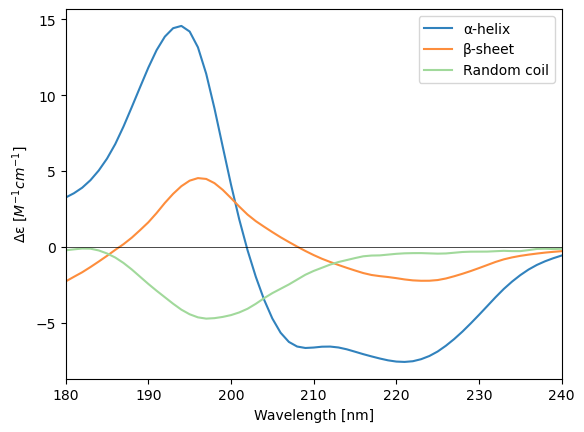

In [103]:
#Plot reference spectra
paths=['Sample/CD0000037000_Final_Processed_Spectrum.txt', 'Sample/CD0000020000_Final_Processed_Spectrum.txt', 'Sample/CD0006407000_Final_Processed_Spectrum.txt']
names_ref=['α-helix', 'β-sheet', 'Random coil']

for i in range(0, len(paths)):
    path=paths[i]
    name_ref=names_ref[i]
    df=pd.read_csv(path, sep='\t')
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    y_smooth = gaussian_filter(y, sigma=1)
    col = cm.tab20c(i/4)
    plt.plot(x, y_smooth, label=name_ref, color=col)

plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

plt.ylabel('Δε [$M^{-1} cm^{-1}$]')
plt.xlabel('Wavelength [nm]')
plt.xlim(180, 240)
plt.legend()
plt.savefig("CD_secondarystructure_reference.png", bbox_inches="tight",pad_inches=0.3)
plt.show()